In [2]:
%pip install yfinance
%pip install nltk
%pip install vaderSentiment
%pip install requests
%pip install matplotlib pandas request

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


In [10]:
#Collect Stock Data
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests

# Specify the start and end dates
start_date = "2025-06-15"
end_date = datetime.now().strftime('%Y-%m-%d')

# Collect Nvidia stock data from the specified date range
nvidia_stock = yf.Ticker("NVDA")
stock_data = nvidia_stock.history(start=start_date, end=end_date)
stock_data.reset_index(inplace=True)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-06-16 00:00:00-04:00,143.350006,146.179993,143.199997,144.690002,183133700,0.0,0.0
1,2025-06-17 00:00:00-04:00,144.490005,145.220001,143.779999,144.119995,139108000,0.0,0.0
2,2025-06-18 00:00:00-04:00,144.009995,145.649994,143.119995,145.479996,161494100,0.0,0.0
3,2025-06-20 00:00:00-04:00,145.449997,146.199997,142.649994,143.850006,242956200,0.0,0.0
4,2025-06-23 00:00:00-04:00,142.500000,144.779999,142.029999,144.169998,154308900,0.0,0.0


In [11]:
stock_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-06-16 00:00:00-04:00,143.350006,146.179993,143.199997,144.690002,183133700,0.0,0.0
1,2025-06-17 00:00:00-04:00,144.490005,145.220001,143.779999,144.119995,139108000,0.0,0.0
2,2025-06-18 00:00:00-04:00,144.009995,145.649994,143.119995,145.479996,161494100,0.0,0.0
3,2025-06-20 00:00:00-04:00,145.449997,146.199997,142.649994,143.850006,242956200,0.0,0.0
4,2025-06-23 00:00:00-04:00,142.500000,144.779999,142.029999,144.169998,154308900,0.0,0.0
5,2025-06-24 00:00:00-04:00,145.559998,147.960007,145.500000,147.899994,187566100,0.0,0.0
6,2025-06-25 00:00:00-04:00,149.270004,154.449997,149.259995,154.309998,269146500,0.0,0.0
7,2025-06-26 00:00:00-04:00,155.979996,156.720001,154.000000,155.020004,198145700,0.0,0.0
8,2025-06-27 00:00:00-04:00,156.039993,158.710007,155.259995,157.750000,263234500,0.0,0.0
9,2025-06-30 00:00:00-04:00,158.399994,158.660004,155.960007,157.990005,194580300,0.0,0.0


In [12]:
api_key = '#enter_your_api_key'


url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Nvidia',
    'from': (datetime.now() - timedelta(days=28)).strftime('%Y-%m-%d'),  # Get articles from the last 30 days
    'sortBy': 'relevancy',
    'apiKey': api_key,
    'pageSize': 100,  # Maximum number of results per page
    'language': 'en'
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Check for errors
if data['status'] != 'ok':
    raise Exception(f"NewsAPI error: {data['message']}")

# Extract articles
articles = data['articles']

# Convert to DataFrame
news_data = pd.DataFrame(articles)
news_data = news_data[['publishedAt', 'title']]
news_data.columns = ['date', 'headline']

In [13]:
news_data

,date,headline
0,2025-07-09T17:14:33Z,"It Started with Games, now It’s the World’s Fi..."
1,2025-07-09T14:09:00Z,"Nvidia Hits $4 Trillion Market Cap, First Comp..."
2,2025-07-09T20:06:37Z,Nvidia Beats Apple to $4 Trillion Market Value
3,2025-06-17T20:04:45Z,"Citi Raises NVIDIA Price Target, Keeps Buy Rating"
4,2025-07-11T15:58:30Z,How Nvidia's rise is minting so many millionai...
...,...,...
95,2025-06-29T12:00:34Z,Best Nintendo Switch 2 power banks
96,2025-06-25T09:26:17Z,UK govt dept website that campaigns against en...
97,2025-06-24T14:29:49Z,"Nvidia RTX 5050 is official: 8GB, $250, coming..."
98,2025-06-30T16:11:38Z,Nvidia tweaks DLSS to use 20% less VRAM for up...


In [14]:
# Preprocess news headlines
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

news_data['cleaned_headline'] = news_data['headline'].apply(preprocess_text)

# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Anonymous\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anonymous\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
news_data

,date,headline,cleaned_headline,sentiment_score
0,2025-07-09T17:14:33Z,"It Started with Games, now It’s the World’s Fi...",Started Games World First Ever Trillion Company,0.0000
1,2025-07-09T14:09:00Z,"Nvidia Hits $4 Trillion Market Cap, First Comp...",Nvidia Hits Trillion Market Cap First Company,0.0000
2,2025-07-09T20:06:37Z,Nvidia Beats Apple to $4 Trillion Market Value,Nvidia Beats Apple Trillion Market Value,0.3400
3,2025-06-17T20:04:45Z,"Citi Raises NVIDIA Price Target, Keeps Buy Rating",Citi Raises NVIDIA Price Target Keeps Buy Rating,0.0000
4,2025-07-11T15:58:30Z,How Nvidia's rise is minting so many millionai...,Nvidia rise minting many millionaires among re...,0.0000
...,...,...,...,...
95,2025-06-29T12:00:34Z,Best Nintendo Switch 2 power banks,Best Nintendo Switch power banks,0.6369
96,2025-06-25T09:26:17Z,UK govt dept website that campaigns against en...,UK govt dept website campaigns encryption hija...,0.0000
97,2025-06-24T14:29:49Z,"Nvidia RTX 5050 is official: 8GB, $250, coming...",Nvidia RTX official coming July,0.0000
98,2025-06-30T16:11:38Z,Nvidia tweaks DLSS to use 20% less VRAM for up...,Nvidia tweaks DLSS use less VRAM upscaling,0.0000


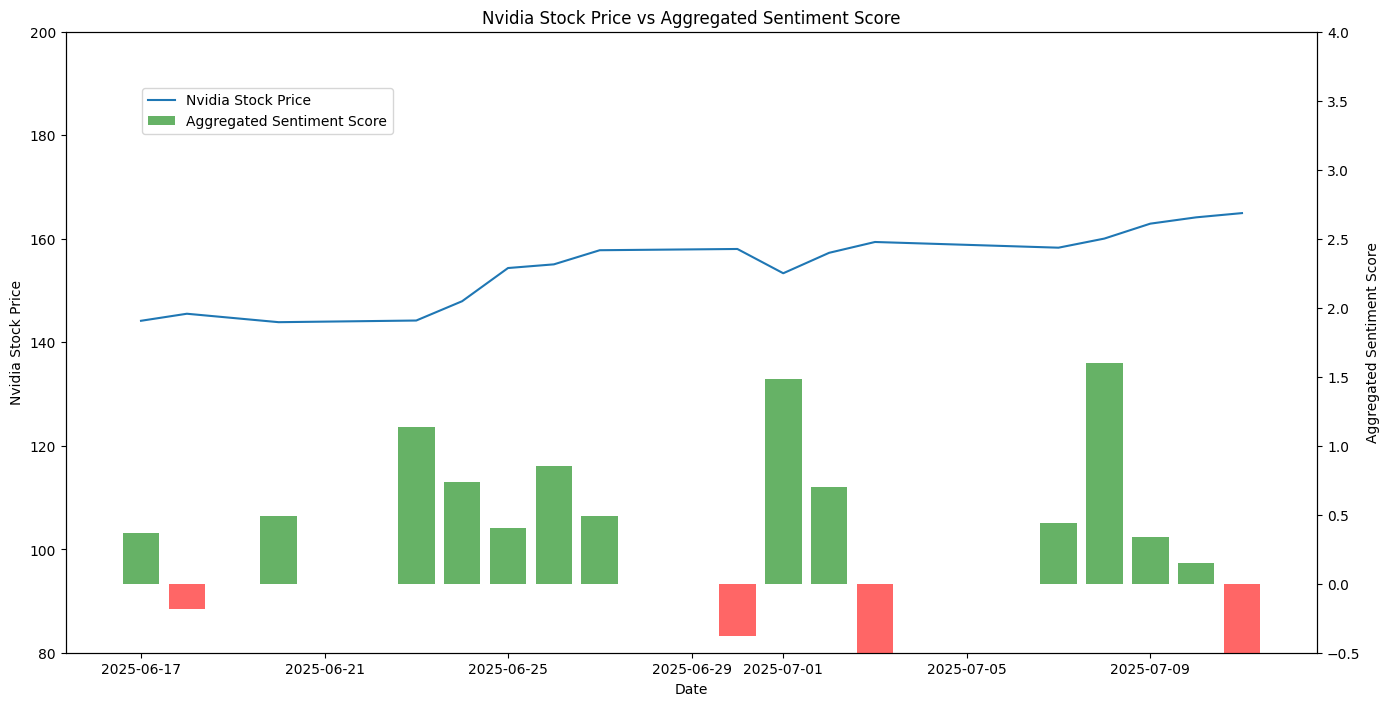

In [18]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

# Convert dates to datetime format
news_data['date'] = pd.to_datetime(news_data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Aggregate sentiment scores by date
aggregated_sentiment = news_data.groupby('date')['sentiment_score'].sum().reset_index()

# Merge stock data with aggregated sentiment scores
combined_data = pd.merge(stock_data, aggregated_sentiment, left_on='Date', right_on='date', how='inner')

# Visualize the data with a secondary y-axis and bar plot for aggregated sentiment scores
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Nvidia Stock Price')
ax1.plot(combined_data['Date'], combined_data['Close'], label='Nvidia Stock Price')
ax1.tick_params(axis='y')
ax1.set_ylim(80, 200)  # Set the left y-axis range

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Aggregated Sentiment Score')

# Use different colors for positive and negative bar values
colors = ['green' if val >= 0 else 'red' for val in combined_data['sentiment_score']]
ax2.bar(combined_data['Date'], combined_data['sentiment_score'], label='Aggregated Sentiment Score', color=colors, alpha=0.6)
ax2.tick_params(axis='y')
ax2.set_ylim(-0.5, 4)  # Set the right y-axis range

fig.tight_layout()
plt.title('Nvidia Stock Price vs Aggregated Sentiment Score')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()